<a href="https://colab.research.google.com/github/arelies-proximo/Data-Science-Projects/blob/main/Analysis/Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects.

They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as **outlier mining**.

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]

 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV  

In [3]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [4]:
x = data[::]
y = target[::]


In [5]:
df = pd.DataFrame(data)

In [12]:
df.columns

RangeIndex(start=0, stop=13, step=1)

In [13]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [6]:
df.columns = cols

In [20]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Features/independent variable will be used to look for any outlier.

There are two types of analysis we will follow to find the outliers- **Uni-variate(one variable outlier analysis)** and **Multi-variate(two or more variable outlier analysis)**.

#**BOX PLOT**

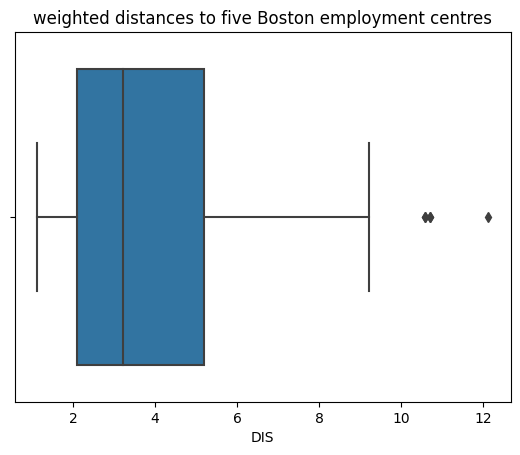

In [26]:
sns.boxplot(x=df['DIS'])
plt.title('weighted distances to five Boston employment centres')


plt.show()


Above plot shows **three points between 10 to 12**, these are **outliers** as there are not included in the box of other observation i.e no where near the quartiles.

analysed Uni-variate outlier i.e. we used DIS column only to check the outlier.

But we can do multivariate outlier analysis too. Can we do the multivariate analysis with Box plot? Well it depends, if you have a categorical values then you can use that with any continuous variable and do multivariate outlier analysis. As we do not have categorical value in our Boston Housing dataset, we might need to forget about using box plot for multivariate outlier analysis.

#**Scatter plot**

The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

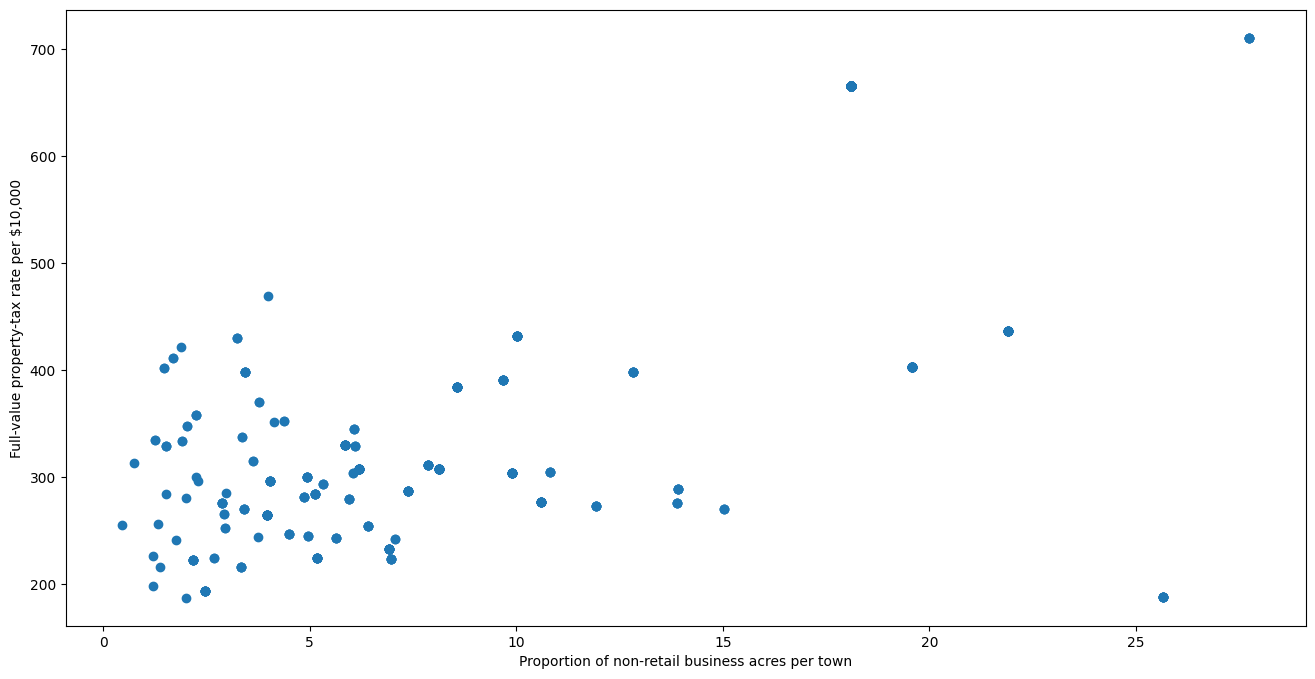

In [27]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['INDUS'], df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

Looking at the plot above, we can most of data points are lying bottom left side but there are points which are far from the population like top right corner.

#**Z-Score**

In simple terms, the Z-score is a statistical measure that tells you how far away a particular data point is from the mean of a dataset, measured in terms of standard deviations. It indicates whether a data point is above or below the mean and how unusual or extreme it is compared to other data points in the dataset.

The **Z-score is calculated** by **subtracting the mean** of the dataset from a specific data point and then **dividing the result by the standard deviation**.

This normalization process allows you to **compare data points from different datasets** or distributions, as it provides a **standardized measure of how far each data point is from the mean**.

The **intuition behind Z-score** is to **describe any data point*** by finding their **relationship with the Standard Deviation and Mean** of the group of data points.

Z-score is **finding the distribution of data where mean is 0 and standard deviation is 1** i.e. **normal distribution.**

A **positive Z-score** indicates that the data point is **above the mean**, while a negative Z-score indicates that it is below the mean. A Z-score of 0 means that the data point is exactly at the mean.

The **magnitude of the Z-score** tells you **how many standard deviations away the data point is** from the mean.

For example, a **Z-score of 2 means** that the data point is **two standard deviations above or below the mean**.

*The Z-score is commonly used in statistics and data analysis to identify outliers, assess the significance of a data point, or standardize data for further analysis.*

##Finding Outliers using z score

while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [13]:
from scipy import stats

In [14]:
z = np.abs(stats.zscore(df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.419782  0.284830  1.287909  0.272599  0.144217  0.413672  0.120013   
1    0.417339  0.487722  0.593381  0.272599  0.740262  0.194274  0.367166   
2    0.417342  0.487722  0.593381  0.272599  0.740262  1.282714  0.265812   
3    0.416750  0.487722  1.306878  0.272599  0.835284  1.016303  0.809889   
4    0.412482  0.487722  1.306878  0.272599  0.835284  1.228577  0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.272599  0.158124  0.439316  0.018673   
502  0.415249  0.487722  0.115738  0.272599  0.158124  0.234548  0.288933   
503  0.413447  0.487722  0.115738  0.272599  0.158124  0.984960  0.797449   
504  0.407764  0.487722  0.115738  0.272599  0.158124  0.725672  0.736996   
505  0.415000  0.487722  0.115738  0.272599  0.158124  0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0    0.14

Looking above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [15]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

**The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.**

In [38]:
type(z)

pandas.core.frame.DataFrame

In [48]:
z.iloc[55,1]

3.375038763517294

In [49]:
z.iloc[466,11]

3.669376372197529

#**IQR score**

##Inter Quartile Score

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [7]:
df.quantile(0.25)

CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
Name: 0.25, dtype: float64

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#IQR for each column
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [12]:
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


#**WORKING WITH OUTLIERS - REMOVING & CORRECTING**

During data analysis when you detect the outlier one of most difficult decision could be how one should deal with the outlier. Should they remove them or correct them?

##Removing rows having z score greater than 3 (or retaining rows having z score less than 3)

In [16]:
len(df)

506

In [17]:
df.shape

(506, 13)

In [18]:
boston_df_o = df.copy()

In [19]:
boston_df_o.shape

(506, 13)

In [20]:
boston_df_o = boston_df_o[(z < 3).all(axis=1)]

In [21]:
boston_df_o.shape

(415, 13)

In [22]:
df.shape

(506, 13)

##retaining only those rows having z score greater then -3

In [25]:
boston_df_o = boston_df_o[(z > -3).all(axis=1)]

<ipython-input-25-8d0a5f6a1165>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  boston_df_o = boston_df_o[(z > -3).all(axis=1)]


In [26]:
boston_df_o.shape

(415, 13)

**above code removed around 90+ rows from the dataset i.e. outliers have been removed.**

##**IQR Score**

In [27]:
df.shape

(506, 13)

In [28]:
boston_df_out = df.copy()

In [29]:
boston_df_out = boston_df_out[~((boston_df_out < (Q1 - 1.5 * IQR)) |(boston_df_out > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(274, 13)

***Whether an outlier should be removed or not. Every data analyst/data scientist might get these thoughts once in every problem they are working on.***



bad data, wrong calculation, these can be identified as Outliers and should be dropped but at the same time you might want to correct them too, as they change the level of data i.e. mean which cause issues when you model your data.

#TO-DO




##Remving by using clusters - https://haridas.in/outlier-removal-clustering.html

##Drop or not to Drop - https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/